# NLP 2017 - HW1

### Asi Messica and Eran Barash

1. Data exploration
1.1 Manual tagging


In [16]:
sentence1 = "One of the most basic and most useful task when processing text is to tokenize each word separately and label each word according to its most likely part of speech."
sentence1_manual_tagging = "One/DET of/ADP the/DET most/ basic/ and/ most/ useful/ task/NOUN when/ processing/VERB text/NOUN is/ to/ tokenize/VERB each/ word/NOUN seaperately/ and/ label/VERB each/ word/NOUN according/ to/ its/ most/ likely/ part/ of/ speech/ "

In [20]:
sentence1_manual_tagging =nltk.pos_tag(nltk.word_tokenize(sentence1))

In [21]:
print(sentence1_manual_tagging)

[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('basic', 'JJ'), ('and', 'CC'), ('most', 'JJS'), ('useful', 'JJ'), ('task', 'NN'), ('when', 'WRB'), ('processing', 'VBG'), ('text', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('tokenize', 'VB'), ('each', 'DT'), ('word', 'NN'), ('separately', 'RB'), ('and', 'CC'), ('label', 'VB'), ('each', 'DT'), ('word', 'NN'), ('according', 'VBG'), ('to', 'TO'), ('its', 'PRP$'), ('most', 'RBS'), ('likely', 'JJ'), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('.', '.')]


1.2 Gathering and Cleaning Up Data

In [1]:
import google3
import justext
import requests
import re
import nltk

search = "nobel prize"
filename = "cleanTxt"
links = google3.getGoogleResults(search)
i=0
cutOff = 20
max = 10
for url in links:
    if (i<max):
            try:
                print(url)
                html = requests.get(url).text
            except:
                print("error") 
            html = re.sub("[\r\n]+", "\n", html)
            html = re.sub("[\n]+", "\n", html)
            html = re.sub("[\t, ]+"," ", html)
            html = re.sub("[\t, ]+","``", html)
            raw = google3.cleanHtml(html)
            if (raw != ''):
                pfileName = filename + str(i) + ".txt"
                print("raw "+str(i)+raw+"\n")
                google3.PrintFile(raw,pfileName)
                i+=1



https://en.wikipedia.org/wiki/Nobel_Prize
https://www.facebook.com/nobelprize/
https://www.youtube.com/user/thenobelprize
https://en.wikipedia.org/wiki/Nobel_Prize
https://www.nobelprize.org/
http://www.businessinsider.com/who-will-win-nobel-prize-in-physics-for-gravitational-waves-2016-2
https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics
http://iaskracker.com/5-things-to-know-about-the-nobel-prize/
http://www.bbc.com/news/world-europe-38280402
https://sweden.se/society/the-nobel-prize-awarding-great-minds/
http://www.nytimes.com/topic/subject/nobel-prizes
http://indianexpress.com/article/world/nobel-prize-2016-bob-dylan-juan-manuel-santos-here-is-the-list-of-winners-and-their-work-4420869/
http://www.independent.co.uk/arts-entertainment/music/news/bob-dylan-nobel-prize-acceptance-speech-read-a7468096.html


In [4]:
#read and tag 20 senteces from one file   

pfileName = ".//Data//"+filename+ "0" + ".txt"
with open(pfileName) as f:
    for line in f:
        print(line)
        tokens = nltk.word_tokenize(line)
        print(tokens)
        tagging = nltk.pos_tag(tokens,tagset='universal')
        print(tagging)
        
        

#print(text)

NameError: name 'filename' is not defined

1.3 Gathering Basic Statistics

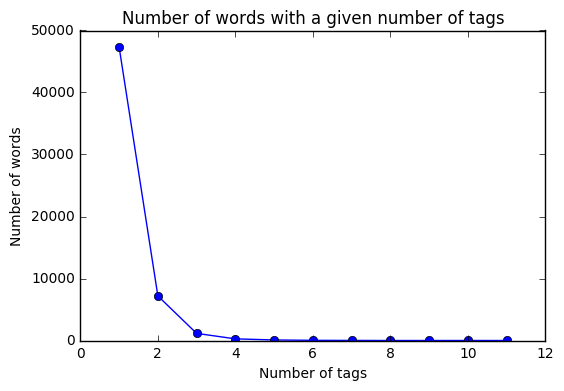

In [17]:
import nltk
from nltk.corpus import brown
import pylab

cfd = nltk.ConditionalFreqDist(brown.tagged_words())
size2words = nltk.Index((len(tags), word) for (word, tags) in cfd.items())
sizes = pylab.arange(1, 12)

pylab.plot(sizes, [len(size2words[size]) for size in sizes], '-bo')
pylab.title('Number of words with a given number of tags')
pylab.xlabel('Number of tags')
pylab.ylabel('Number of words')
pylab.show()

2. Stratified Test/Train Sets
'train' and 'test' are dictionaries of category: tagged_sents. This was done inorder to simplify follwing tasks. 

In [76]:
import nltk
from functools import reduce
from nltk.corpus import brown 

def category_split(sents, ratio):
    size = int(len(sents) * ratio)
    return sents[:size], sents[size:]

def stratified_split(corpus, ratio=0.9):
    train = {}
    test = {}
    for cat in corpus.categories():
        cat_train_test = category_split(corpus.tagged_sents(categories=cat), ratio)
        train[cat] = cat_train_test[0]
        test[cat] = cat_train_test[1]
    return train, test

In [216]:
train, test = stratified_split(brown)

3. Unigram

3.1.1 Class SimpleUnigramTagger

In [268]:
import nltk
from collections import defaultdict
class SimpleUnigramTagger(nltk.TaggerI):
    def __init__(self, train):
        self._train(train)
        
    def _train(self, tagged_corpus):
        tagged_words = [tagged_word for sent in tagged_corpus for tagged_word in sent]
        cfd = nltk.ConditionalFreqDist(tagged_words)
        self._likely_tags = defaultdict(lambda: 'NONE')
        for word in cfd:
            self._likely_tags[word] = cfd[word].max()
        
    def tag(self, tokens):
        return [(word, self._likely_tags[word]) for word in tokens]
    
    def tag_one(self, word):
        return word, self._likely_tags[word]


3.1.2 SimpleUnigramTagger and nltk.UnigramTagger evalution comparison

In [105]:
clean_train = [sent for sents in train.values() for sent in sents]
clean_test = [sent for sents in test.values() for sent in sents]
tagger = SimpleUnigramTagger(train=clean_train)
nltk_tagger = nltk.UnigramTagger(train=clean_train)

print("SimpleUnigramTagger evaluation: \n{0}\n".format(tagger.evaluate(clean_test)))
print("nltk.UnigramTagger evaluation: \n{0}".format(nltk_tagger.evaluate(clean_test)))

SimpleUnigramTagger evaluation: 
0.8817004462080685

nltk.UnigramTagger evaluation: 
0.8817004462080685


3.1.3 Known and unknown words

In [137]:
def remove_tags(sent):
    return [word for (word, _) in sent]
tagged_test = [tagger.tag(remove_tags(sent)) for sent in clean_test]
test_size = sum([1 for sent in clean_test for word in sent])
unk_num = sum([1 for sent in tagged_test for (_, tag) in sent if tag == "NONE"])
known_num = 0
for i in range(len(clean_test)):
    for j in range(len(clean_test[i])):
        if (tagged_test[i][j][1] != "NONE") and (tagged_test[i][j][1] != clean_test[i][j][1]):
            known_num += 1
print("Error due to unknown words: {0}.".format(unk_num/test_size))
print("Error due to known words: {0}.".format(known_num/test_size))

Error due to unknown words: 0.040594051117194496.
Error due to known words: 0.07770550267473691.


3.1.4 Rate of unknown words per category

In [103]:
for cat in test.keys():
    tagged_words = tagger.tag([word for sent in test[cat] for (word, _) in sent])
    print("{0}: {1} unkown words.".format(cat, sum([1 for (_, tag) in tagged_words if tag == "NONE"])))

mystery: 146 unkown words.
lore: 393 unkown words.
adventure: 364 unkown words.
belles_lettres: 793 unkown words.
religion: 70 unkown words.
reviews: 219 unkown words.
hobbies: 435 unkown words.
news: 392 unkown words.
government: 233 unkown words.
science_fiction: 26 unkown words.
romance: 191 unkown words.
learned: 943 unkown words.
humor: 172 unkown words.
editorial: 244 unkown words.
fiction: 228 unkown words.


3.2 Using Entropy to Filter Affix Tagger

In [405]:
from math import log
from collections import defaultdict

# length of suffix to map suffix->tag
suffix_length = -2

# get token's suffix 
def get_context(token):
    return token[suffix_length:]

def entropy(tag_fd):
    total_occ = sum([occ for (_, occ) in tag_fd])
    res = 0
    for (_, occ) in tag_fd:
        p = occ / total_occ
        res -= p * log(p, 2)
    return res

def aff_train(tagged_corpus, cutoff=0):
    
    # Count how many times each tag occurs in each context.
    fd = nltk.ConditionalFreqDist()
    for sentence in tagged_corpus:
        for (token, tag) in sentence:
            context = get_context(token)
            fd[context][tag] += 1
    
    context_to_tag = dict((word, fd[word].max()) for word in fd if entropy(fd[word].items()) < cutoff)
    return context_to_tag
    
    

Dividing the train set to train and developement:

In [395]:
ratio = 0.9
opt_train = []
opt_dev = []
for sents in train.values():
    train_size = int(ratio * len(sents))
    opt_train += sents[:train_size]
    opt_dev += sents[train_size:]

Choosing cutoff's range

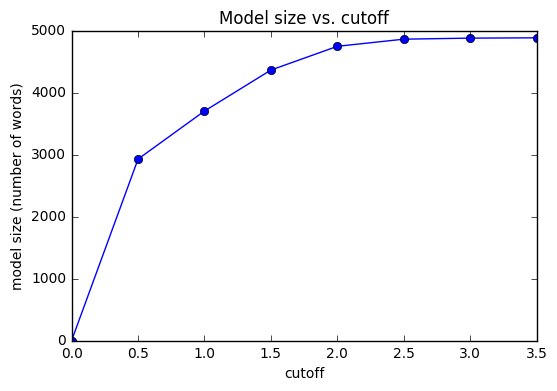

In [308]:
import pylab
from numpy import arange
cutoffs = arange(0, 4, 0.5)
pylab.plot(cutoffs, [len(aff_train(clean_train, cutoff)) for cutoff in cutoffs], '-bo')
pylab.title('Model size vs. cutoff')
pylab.xlabel('cutoff')
pylab.ylabel('model size (number of words)')
pylab.show()

Optimizing the cutoff

In [396]:
backoff = SimpleUnigramTagger(opt_train)
counter = 0
def aff_tag_one(token, context):
    if token in context:
        return token, context[token]
        
    else:
        return backoff.tag_one(token)

def aff_tag(tokens, context):
    return [aff_tag_one(token, context) for token in tokens]

In [397]:
opt_dev_clean = [word for sent in opt_dev for word in sent]
size = len(opt_dev_clean)
def opt_cutoff(cutoff):
    context_to_tag = aff_train(opt_train, cutoff)
    tagged = aff_tag(remove_tags(opt_dev_clean), context_to_tag)
    error = 0
    for i in range(len(opt_dev_clean)):
        if tagged[i][1] != opt_dev_clean[i][1]:
            error += 1
    return error / size

In [403]:
cutoffs = arange(0, 1, 0.1)
errors = [opt_cutoff(cutoff) for cutoff in cutoffs]

In [404]:
[1-error for error in errors]

[0.8700567147795442,
 0.8701626337226657,
 0.8701915207071533,
 0.8701915207071533,
 0.8701915207071533,
 0.8701915207071533,
 0.8701915207071533,
 0.8636534332181064,
 0.8636534332181064,
 0.8636534332181064]

In [400]:
backoff.evaluate(opt_dev)

0.8700567147795442

Extracting good suffixes

In [413]:
context_to_tag = aff_train(opt_train, 0.6)
print(",".join(context_to_tag.keys()))

0A,Af,ba,ec,p,.',UK,/,zz,dl,Oh,4),En,B.,Eh,m',5o,ja,of,12,AO,ES,-H,xt,ei,ef,y.,yn,hs,CC,er,nc,88,is,yr,UN,ew,42,.3,j),t},rv,x.,64,ys,9),PM,ch,Q,W,a),-m,Or,KK,ky,-C,81,K.,ar,Y.,EB,ID,sz,-D,gi,av,sc,14,MU,MR,7%,a.,rz,om,ha,ex,uk,Do,jA,uo,yg,ue,6%,bb,'t,VA,ii,xy,d-,98,.2,2,SM,uf,ga,op,C,GA,hm,9',hn,2d,PA,Bo,13,ai,fi,7b,FM,MF,.1,RA,lo,n-,en,ry,72,IA,-o,de,),ub,59,S,'d,q.,I,21,ya,ld,si,ju,wo,CO,pe,45,2C,He,83,F.,'y,vi,ho,wt,o-,O.,GS,ej,0s,jo,NP,VC,``,0-,5-,ds,P',uh,04,e-,M,na,ji,Mi,Eq,43,up,oh,Cr,el,ri,pp,wl,ph,Is,Du,aq,N,OM,/2,:,99,h-,es,li,Q3,fy,rd,25,di,to,39,8e,84,lb,',ix,we,ED,'',go,91,Rh,C',rn,97,ou,ev,od,ms,ki,nh,je,.,nz,h,ie,-d,At,DR,yk,-4,HS,AI,m.,BA,ft,t-,l,3,po,TV,82,Il,dt,YM,vt,eu,cm,n',08,],9,k',40,W.,c),OP,hr,3M,em,Le,55,V.,wi,No,g-,af,fs,sa,38,31,ck,gs,Q.,17,io,6A,a,96,LP,yt,xe,01,rl,51,D.,4',86,b-,44,Al,pm,49,ed,AD,67,an,MM,BE,WC,Um,MI,AM,SE,ik,YJ,Hi,tt,[,HA,so,ep,34,NT,-T,co,l.,qw,-2,My,.0,Ti,We,hl,6a,rf,Jo,MT,48,Pi,PI,NW,-c,69,nq,TO,H6,WS,bl,75,H,gm,hk,ip,El,ve,kh,DF,mi,GM

### Discussion:

Does entropy filtering improve the accuracy of the AffixTagger?
As seen above, entropy filtering did not improve the unigram tagger's accuracy. Tests were done on suffixes of length 3 and 2. Only 2-long suffixes improved accuracy by a negligent sum.

How do you determine the range of values to test for the cutoff?
As seen in the graph above, the range which affected the context size was chosen as the tested cutoff range. At the beginning, the range was 0..3, but it was then reduced to 0..1 since the error was monotonously rising after roughly cutoff=6.

Is the accuracy value evolving in a predictable manner as the cutoff varies?
As the cutoff increases, accuracy reduces. As the cutoff increases, the model allows more suffix tagging, and relies less on the unigram tagger. In this particular case, the unigram tagging seems preferable to suffix tagging, and thus the trend makes sense. Perhaps on a larger database, suffix tagging would have shown better results. 

Describe the list of suffixes that are good tag predictors -- are you surprised by what you observe?
Seems like mostly random letters, digits, signs. These were presumably rare in the data-set and thus less ambigous - better predictors. In some cases, those are complete words, like am (which could be ambigous also) or he (less ambigous).  